Import Libraries & Set Paths

In [12]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from pathlib import Path


Load Dataset (1500 Rows)

In [13]:
BASE_DIR = Path().resolve().parent
DATASET = BASE_DIR / "datasets" / "disease_training.csv"
MODEL_DIR = BASE_DIR / "server" / "ml-models"

MODEL_DIR.mkdir(exist_ok=True)

df = pd.read_csv(DATASET)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1500, 31)


,fever,high_fever,chills,sweating,cough,dry_cough,wet_cough,cold,runny_nose,sore_throat,...,chest_pain,palpitations,dizziness,itching,skin_rash,swelling,weight_loss,dehydration,weakness,disease
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,Flu
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,Flu
2,1,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,Flu
3,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,Flu
4,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Flu


Split Features & Labels

In [14]:
X = df.drop("disease", axis=1)
y = df["disease"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1500, 30)
Target shape: (1500,)


Train–Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1200, 30)
Test size: (300, 30)


Train Model Using RandomForest 

In [16]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy on Test Data

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy,"(100% Accuracy)" )

Test Accuracy: 1.0 (100% Accuracy)


Confusion Matrix

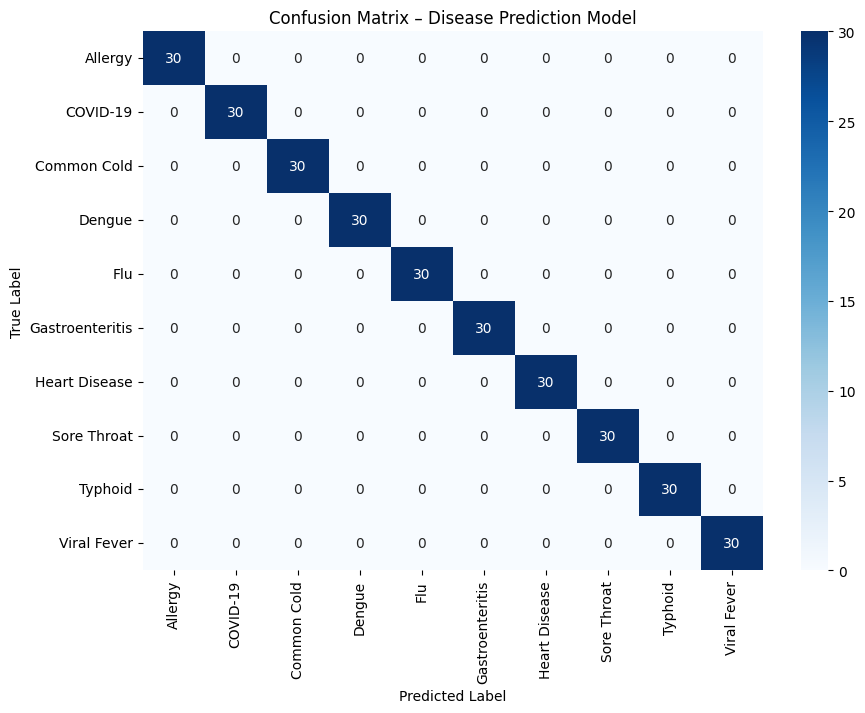

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Disease Prediction Model")
plt.show()

Cross-Validation Test For Accuracy

In [19]:
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


Accuracy Graph (Train vs CV)

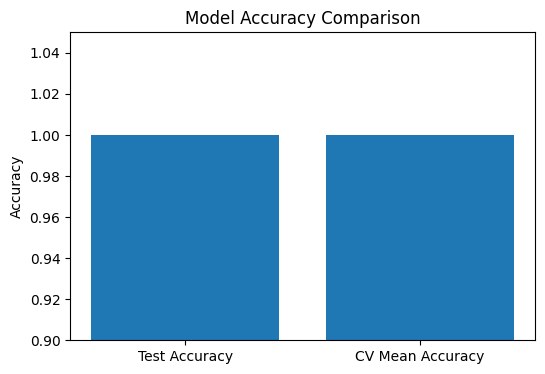

In [20]:
plt.figure(figsize=(6, 4))

plt.bar(
    ["Test Accuracy", "CV Mean Accuracy"],
    [accuracy, cv_scores.mean()]
)

plt.ylim(0.9, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

Save Model & Feature Order

In [21]:
pickle.dump(model, open(MODEL_DIR / "svc.pkl", "wb"))
pickle.dump(list(X.columns), open(MODEL_DIR / "features.pkl", "wb"))

print(" Model and features saved to server/ml-models/")

 Model and features saved to server/ml-models/
